In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from Algorithms import Logistic, forward_feature_selection, sampling
import matplotlib.pyplot as plt

titanic_data = pd.read_csv('train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Preprocessing


In [5]:
label_encoder = LabelEncoder()

titanic_data.fillna(titanic_data.median(numeric_only=True), inplace=True)

titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(
    titanic_data['Embarked'])
titanic_data['Pclass'] = label_encoder.fit_transform(titanic_data['Pclass'])


X = titanic_data.drop(
    columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])
y = titanic_data['Survived']

## Histogram of Dataframe


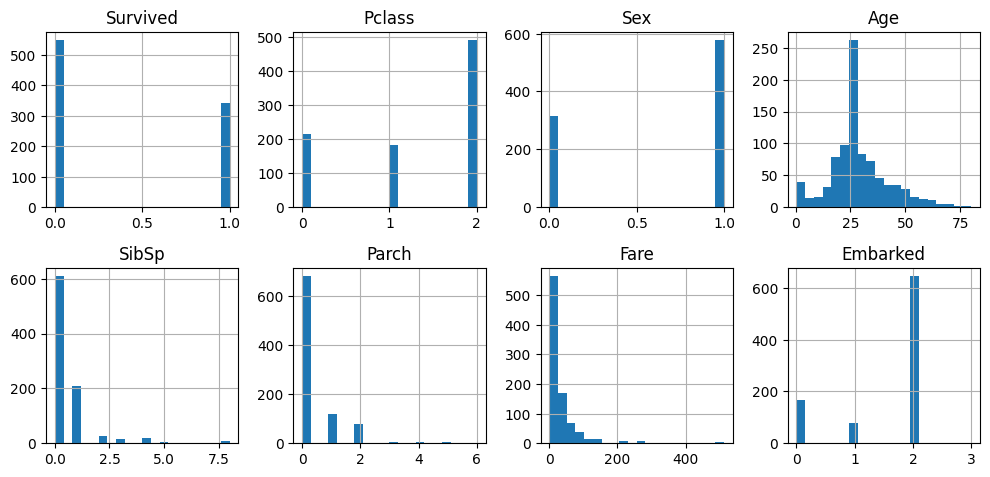

In [6]:
df = titanic_data.drop(
    columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])
df.hist(bins=20, figsize=(10, 7), layout=(3, 4))
plt.tight_layout()
plt.show()

## Fisher Ratio


In [7]:
means_0 = X[y == 0].mean()
means_1 = X[y == 1].mean()
vars_0 = X[y == 0].var()
vars_1 = X[y == 1].var()

fisher_ratios = {}
for column in X.columns:
    fisher_ratio = ((means_1[column] - means_0[column])
                    ** 2) / ((vars_1[column]**2) + (vars_0[column]**2))
    fisher_ratios[column] = fisher_ratio

fisher_ratios_df = pd.DataFrame(list(fisher_ratios.items()), columns=[
                                'Feature', 'Fisher Ratio'])
print(fisher_ratios_df.sort_values(by='Fisher Ratio', ascending=False))

    Feature  Fisher Ratio
1       Sex      4.500460
0    Pclass      0.398572
6  Embarked      0.080801
4     Parch      0.022468
3     SibSp      0.002130
2       Age      0.000050
5      Fare      0.000033


## Forward Feature Selection


In [8]:
model = Logistic()
max_features = 6

selected_features, selected_score, best_features, best_score = forward_feature_selection(
    X, y.to_numpy(), model, max_features)
print("Selected features:", selected_features, selected_score)
print("Best features:", best_features, best_score)

Selected features: ['Pclass', 'Sex', 'Parch', 'Embarked', 'SibSp', 'Age'] 0.6846240179573513
Best features: ['Pclass', 'Sex', 'Parch'] 0.7407407407407407


## Over-Sampling & Under-Sampling

In [9]:
print(f'Before sampling class distribution:\n{y.value_counts()}')

Before sampling class distribution:
Survived
0    549
1    342
Name: count, dtype: int64


In [10]:
X_sampled, y_sampled = sampling(X, y)
print(f'Combined sampling class distribution:\n{y_sampled.value_counts()}')

Combined sampling class distribution:
0.0    446
1.0    445
Name: count, dtype: int64


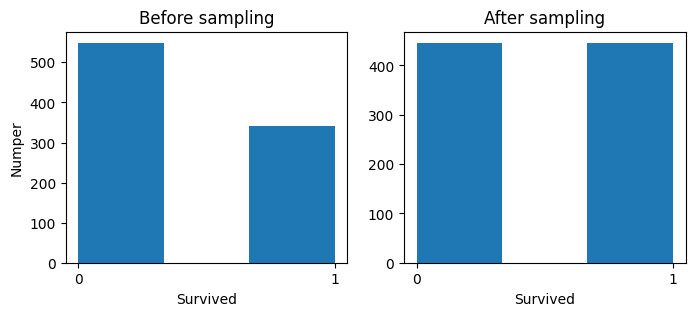

In [11]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.hist(y, bins=3)
plt.title('Before sampling')
plt.xlabel('Survived')
plt.ylabel('Numper')
plt.xticks([0, 1])

plt.subplot(1, 2, 2)
plt.hist(y_sampled, bins=3)
plt.title('After sampling')
plt.xlabel('Survived')
plt.xticks([0, 1])
plt.show()